# MOHAMMED REHAN
MACHINE LEARNING INTERN @ BHARAT INTERN

TASK-01
HOUSE PRICE PREDICTION

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#reading dataset
hd=pd.read_csv("C:\datasets\houseprice.csv")
hd.head()

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [24]:
hd.tail()

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
21608,21609,20140725T000000,365000.0,5,2.00,1600,4168,1.5,0,0,...,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168
21609,21610,20150311T000000,380000.0,2,1.00,1040,7372,1.0,0,0,...,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150
21610,21611,20140624T000000,339000.0,3,1.00,1100,4128,1.0,0,0,...,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538
21611,21612,20140703T000000,399900.0,2,1.75,1410,1005,1.5,0,0,...,9,900,510,2011,0,98027,47.5446,-122.018,1440,1188
21612,21613,20141030T000000,268950.0,3,1.00,1320,8100,1.0,0,0,...,6,880,440,1943,0,98166,47.4697,-122.351,1000,8100


In [25]:
hd.isnull().sum()

ID               0
Date             0
Price            0
Bedrooms         0
Bathrooms        0
Sqft_living      0
Sqft_lot         0
Floors           0
Waterfront       0
View             0
Condition        0
Grade            0
Sqft_above       0
Sqft_basement    0
Yr_built         0
Yr_renovated     0
zipcode          0
Lat              0
Long             0
Sqft_living15    0
Sqft_lot15       0
dtype: int64

In [26]:
hd.columns

Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

In [27]:
hd.shape

(21613, 21)

In [28]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

In [29]:
hd.describe()

,ID,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10807.00000,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5404.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10807.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16210.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21613.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [30]:
hd.dtypes

ID                 int64
Date              object
Price            float64
Bedrooms           int64
Bathrooms        float64
Sqft_living        int64
Sqft_lot           int64
Floors           float64
Waterfront         int64
View               int64
Condition          int64
Grade              int64
Sqft_above         int64
Sqft_basement      int64
Yr_built           int64
Yr_renovated       int64
zipcode            int64
Lat              float64
Long             float64
Sqft_living15      int64
Sqft_lot15         int64
dtype: object

In [31]:
from warnings import filterwarnings
filterwarnings(action='ignore')
hd.corr()

,ID,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
ID,1.000000,-0.016578,0.002100,0.003791,-0.013228,-0.136540,0.015831,-0.003573,0.012509,-0.021685,0.007749,-0.013270,-0.002623,0.019339,-0.017579,-0.011795,-0.001849,0.015529,-0.003885,-0.143569
Price,-0.016578,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
Bedrooms,0.002100,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
Bathrooms,0.003791,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
Sqft_living,-0.013228,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
Sqft_lot,-0.136540,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
Floors,0.015831,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
Waterfront,-0.003573,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
View,0.012509,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
Condition,-0.021685,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


# HEATMAP

<Axes: >

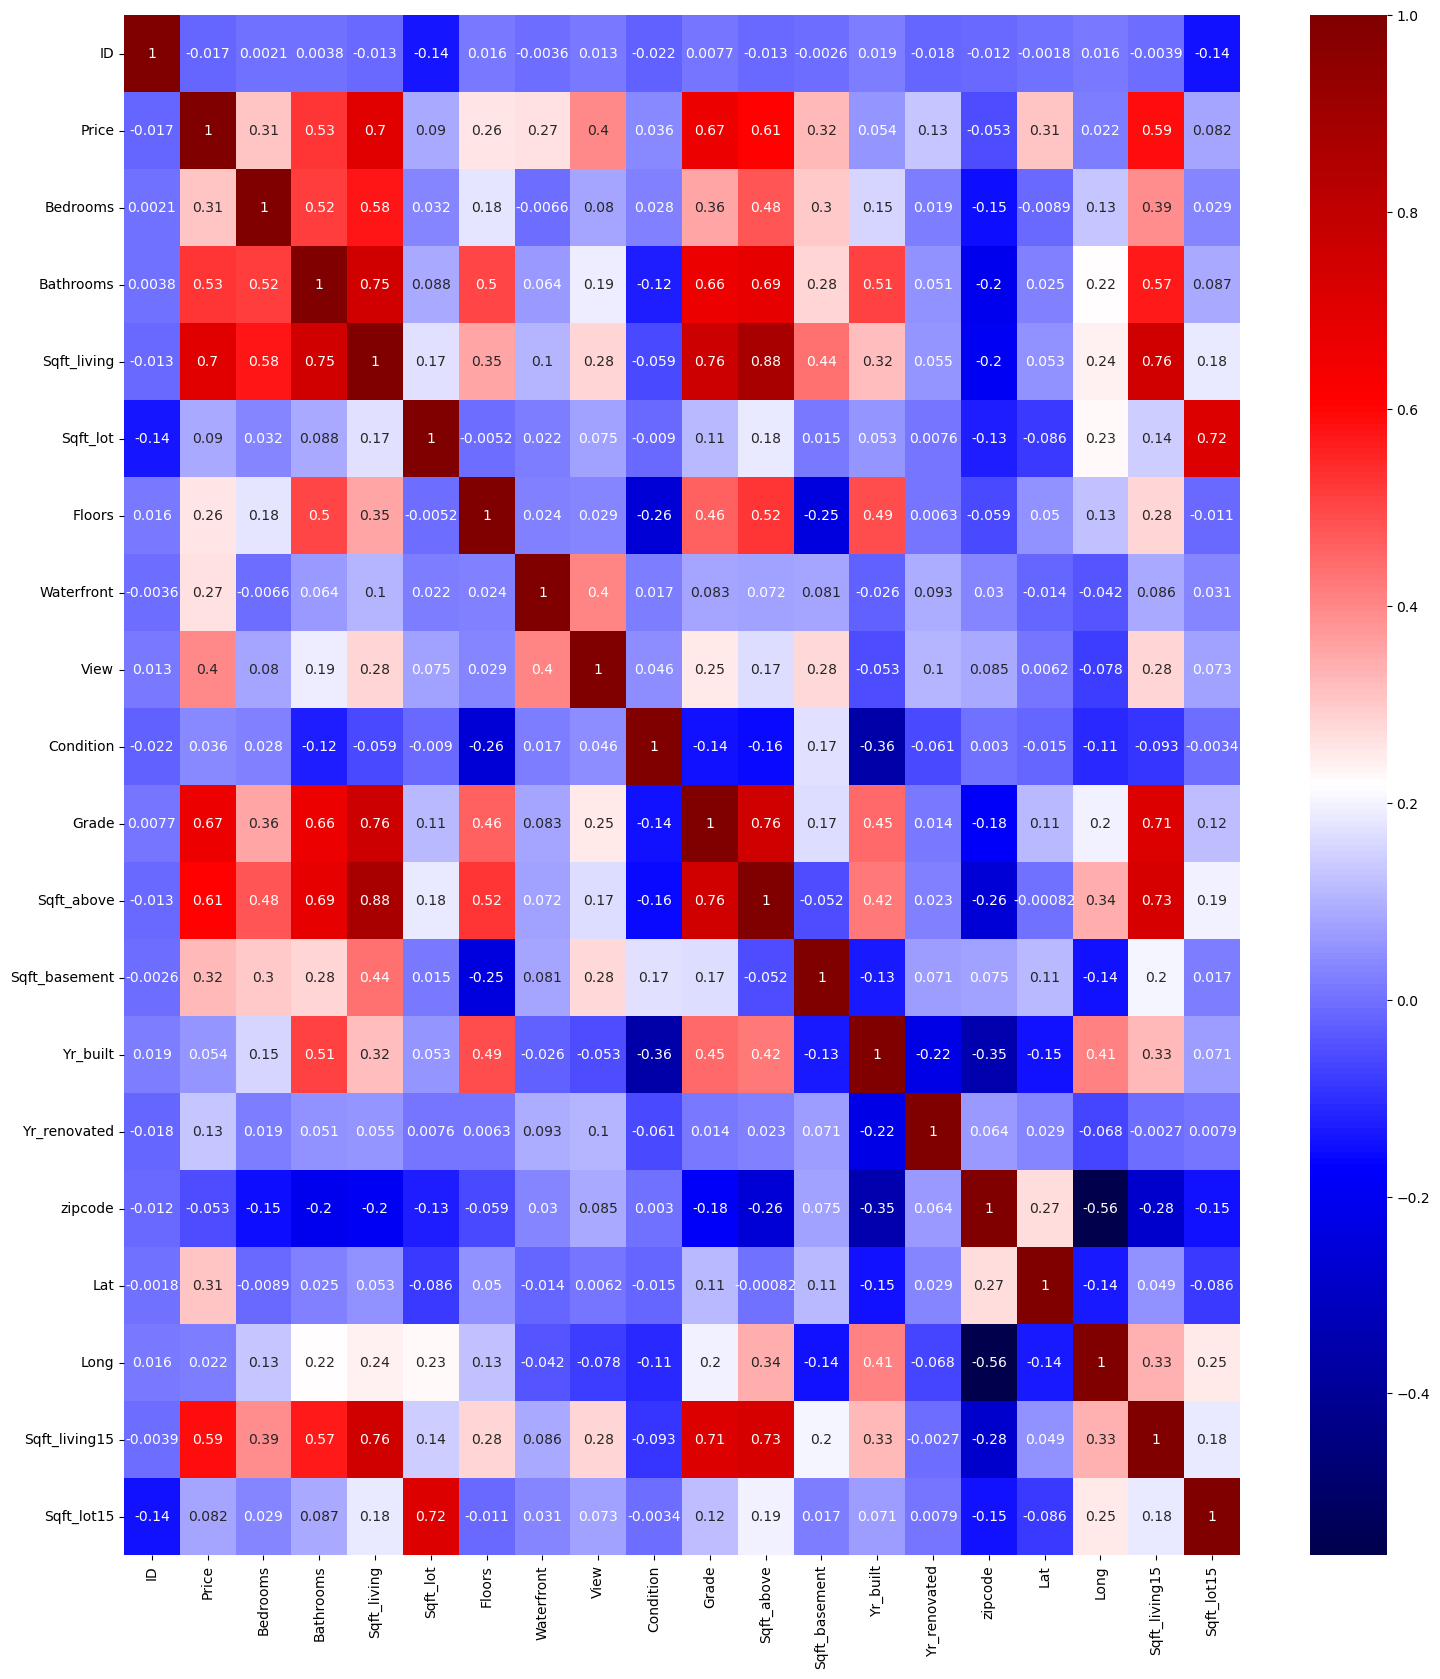

In [32]:
plt.figure(figsize=(18,20))
sns.heatmap(hd.corr(),cmap='seismic',annot=True)

# TRAINING DATASET

In [33]:
predict='Price'
features=['ID','Price','Bedrooms','Bathrooms','Sqft_living',
       'Sqft_lot','Floors','Waterfront','View','Condition','Grade',
       'Sqft_above','Sqft_basement','Yr_built','Yr_renovated','zipcode',
       'Lat','Long','Sqft_living15','Sqft_lot15']
x=np.array(hd[features].drop(columns=[predict]))
y=np.array(hd[predict])

In [34]:
x.shape,y.shape

((21613, 19), (21613,))

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15129, 19), (6484, 19), (15129,), (6484,))

# LINEAR REGRESSION

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
predictions=model.predict(x_test)
model.score(x_test,predictions)*100

100.0

# LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [41]:
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
predictions=model.predict(x_test)
model.score(x_test,predictions)

1.0